# Agrupamento - Wine - Feito!

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import os

np.random.seed(0)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import tensorflow as tf
from sklearn.datasets import load_wine
data = load_wine()

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [3]:
X_train, Y_train = data.data, data.target

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [5]:
X_train = scaler.fit_transform(X_train)

In [6]:
centroides = [np.random.rand(3,13) for i in range(10)]

### Aplicação do K-means

In [7]:
from sklearn.cluster import KMeans

melhor_acuracia = 0

for cent_init in centroides:

    kmeans = KMeans(n_clusters = 3, init = cent_init, random_state = 42)
    kmeans.fit(X_train)

    confusion_matrix = np.zeros((3,3))
    for i in range(3):
        for j in range(3):
            confusion_matrix[i,j] = sum((kmeans.labels_ == i) & (Y_train == j))

    df_cm = pd.DataFrame(confusion_matrix, index = [i for i in "012"],
                      columns = [i for i in "012"])

    c = df_cm.copy()
    mapping = {}

    for a in range(3):
        ind_x, ind_y = np.unravel_index(np.argmax(c, axis=None), c.shape)
        mapping[int(c.index[ind_x])] = int(c.columns[ind_y])
        c.drop([c.index[ind_x]], axis=0, inplace=True)
        c.drop([c.columns[ind_y]], axis=1, inplace=True)

    Y_pred = np.array([mapping[x] for x in kmeans.labels_])

    confusion_matrix = np.zeros((3,3))
    for i in range(3):
        for j in range(3):
            confusion_matrix[i,j] = sum((Y_pred == i) & (Y_train == j))

    df_cm = pd.DataFrame(confusion_matrix, index = [i for i in "012"],
                      columns = [i for i in "012"])

    acuracia = np.sum(confusion_matrix.diagonal())/np.sum(confusion_matrix)
    if melhor_acuracia<acuracia:
        melhor_acuracia=acuracia
        melhor_ypred = Y_pred
        melhor_confusion_matrix = confusion_matrix

    print('Acurácia:', acuracia)

Acurácia: 0.949438202247191
Acurácia: 0.949438202247191
Acurácia: 0.9438202247191011
Acurácia: 0.949438202247191
Acurácia: 0.949438202247191
Acurácia: 0.949438202247191
Acurácia: 0.949438202247191
Acurácia: 0.949438202247191
Acurácia: 0.949438202247191
Acurácia: 0.9550561797752809


In [11]:
df_cm = pd.DataFrame(melhor_confusion_matrix, index = [i for i in "012"],
                      columns = [i for i in "012"])

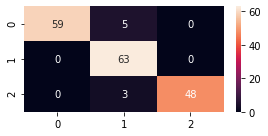

In [8]:
plt.figure(figsize = (4,2))
sns.heatmap(df_cm, annot=True)
plt.tight_layout()
plt.show()

### Aplicação do K-means adaptativo exato

In [9]:
from hard import kmeans_constraints_exato

melhor_acuracia = 0

for cent_init in centroides:

    n_samples = len(X_train)
    clusters = 3
    Z = np.ones((n_samples,))
    mu = np.array([71, 48, 59])
    
    LABELS = kmeans_constraints_exato(X_train,Z,clusters,cent_init,mu)
    labels = LABELS[-1]

    confusion_matrix = np.zeros((3,3))
    for i in range(3):
        for j in range(3):
            confusion_matrix[i,j] = sum((labels == i) & (Y_train == j))

    df_cm = pd.DataFrame(confusion_matrix, index = [i for i in "012"],
                      columns = [i for i in "012"])
    
    c = df_cm.copy()
    mapping = {}

    for a in range(3):
        ind_x, ind_y = np.unravel_index(np.argmax(c, axis=None), c.shape)
        mapping[int(c.index[ind_x])] = int(c.columns[ind_y])
        c.drop([c.index[ind_x]], axis=0, inplace=True)
        c.drop([c.columns[ind_y]], axis=1, inplace=True)

    Y_pred = np.array([mapping[x] for x in labels])

    confusion_matrix = np.zeros((3,3))
    for i in range(3):
        for j in range(3):
            confusion_matrix[i,j] = sum((Y_pred == i) & (Y_train == j))

    df_cm = pd.DataFrame(confusion_matrix, index = [i for i in "012"],
                      columns = [i for i in "012"])

    acuracia = np.sum(confusion_matrix.diagonal())/np.sum(confusion_matrix)
    if melhor_acuracia<acuracia:
        melhor_acuracia=acuracia
        melhor_ypred = Y_pred
        melhor_confusion_matrix = confusion_matrix

    print('Acurácia:', acuracia)

Acurácia: 0.8764044943820225
Acurácia: 0.8707865168539326
Acurácia: 0.9662921348314607
Acurácia: 0.9662921348314607
Acurácia: 0.8539325842696629
Acurácia: 0.9662921348314607
Acurácia: 0.9213483146067416
Acurácia: 0.8764044943820225
Acurácia: 0.9662921348314607
Acurácia: 0.8764044943820225


In [11]:
df_cm = pd.DataFrame(melhor_confusion_matrix, index = [i for i in "012"],
                      columns = [i for i in "012"])

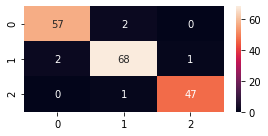

In [12]:
plt.figure(figsize = (4,2))
sns.heatmap(df_cm, annot=True)
plt.tight_layout()
plt.show()

### Aplicação do K-means adaptativo com função de priorização

In [13]:
mu = np.array([71, 48, 59])

In [18]:
from hard import pert_ident, pert_quad, softmax, kmeans_capacity_constraints

melhor_acuracia = 0

for cent_init in centroides:

    n_samples = len(X_train)
    clusters = 3
    Z = np.ones((n_samples,))
    mu = np.array([71, 48, 59])
    
    LABELS, _ = kmeans_capacity_constraints(X_train,Z,clusters,softmax,cent_init,mu)
    labels = LABELS[-1]

    confusion_matrix = np.zeros((3,3))
    for i in range(3):
        for j in range(3):
            confusion_matrix[i,j] = sum((labels == i) & (Y_train == j))

    df_cm = pd.DataFrame(confusion_matrix, index = [i for i in "012"],
                      columns = [i for i in "012"])
    
    c = df_cm.copy()
    mapping = {}

    for a in range(3):
        ind_x, ind_y = np.unravel_index(np.argmax(c, axis=None), c.shape)
        mapping[int(c.index[ind_x])] = int(c.columns[ind_y])
        c.drop([c.index[ind_x]], axis=0, inplace=True)
        c.drop([c.columns[ind_y]], axis=1, inplace=True)

    Y_pred = np.array([mapping[x] for x in labels])

    confusion_matrix = np.zeros((3,3))
    for i in range(3):
        for j in range(3):
            confusion_matrix[i,j] = sum((Y_pred == i) & (Y_train == j))

    df_cm = pd.DataFrame(confusion_matrix, index = [i for i in "012"],
                      columns = [i for i in "012"])

    acuracia = np.sum(confusion_matrix.diagonal())/np.sum(confusion_matrix)
    if melhor_acuracia<acuracia:
        melhor_acuracia=acuracia
        melhor_ypred = Y_pred
        melhor_confusion_matrix = confusion_matrix

    print('Acurácia:', acuracia)

Acurácia: 0.8651685393258427
Acurácia: 0.848314606741573
Acurácia: 0.8651685393258427
Acurácia: 0.8651685393258427
Acurácia: 0.848314606741573
Acurácia: 0.8651685393258427
Acurácia: 0.898876404494382
Acurácia: 0.848314606741573
Acurácia: 0.8426966292134831
Acurácia: 0.8370786516853933


In [14]:
np.unique(Y_pred,return_counts=True)

(array([0, 1, 2]), array([71, 59, 48], dtype=int64))

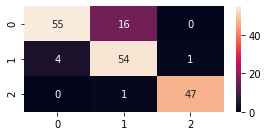

In [11]:
plt.figure(figsize = (4,2))
sns.heatmap(df_cm, annot=True)
plt.tight_layout()
plt.show()